In [3]:
import os
import matplotlib.pyplot as plt


In [4]:

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [5]:
img_width=256
img_height=256
batch_size=16


In [6]:
TRAINING_DIR = '../weather_pred/Data/training/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True
								   )



In [7]:

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))


Found 1274 images belonging to 5 classes.


In [8]:

VALIDATION_DIR = '../weather_pred/Data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

In [9]:

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )



Found 226 images belonging to 5 classes.


In [10]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '../CNN_aug_drop25_best_weights_256.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


In [11]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
	
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

In [13]:

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics =['accuracy'])


In [20]:
from tensorflow.keras.models import Model
vgg16_model = Model(model.input, model.get_layer(index=-1).output)
for layer in vgg16_model.layers[:-7]:
    layer.trainable = False
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496 

In [14]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

C:\Users\IT45\AppData\Local\Temp\ipykernel_4196\1684453781.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
80/80 [==============================] - 61s 740ms/step - loss: 1.6057 - accuracy: 0.2331 - val_loss: 1.9944 - val_accuracy: 0.2345
Epoch 2/30
80/80 [==============================] - 54s 671ms/step - loss: 1.3104 - accuracy: 0.3917 - val_loss: 1.1965 - val_accuracy: 0.4159
Epoch 3/30
80/80 [==============================] - 52s 654ms/step - loss: 1.2261 - accuracy: 0.4113 - val_loss: 1.1963 - val_accuracy: 0.4027
Epoch 4/30
80/80 [==============================] - 54s 672ms/step - loss: 1.1954 - accuracy: 0.4176 - val_loss: 1.1726 - val_accuracy: 0.4248
Epoch 5/30
80/80 [==============================] - 50s 623ms/step - loss: 1.1834 - accuracy: 0.4474 - val_loss: 1.1720 - val_accuracy: 0.4381
Epoch 6/30
80/80 [==============================] - 49s 604ms/step - loss: 1.1635 - accuracy: 0.4325 - val_loss: 1.1869 - val_accuracy: 0.4115
Epoch 7/30
80/80 [==============================] - 50s 622ms/step - loss: 1.1521 - accuracy: 0.4349 - val_loss: 1.2153 - val_accuracy: 0.4071

In [22]:

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))


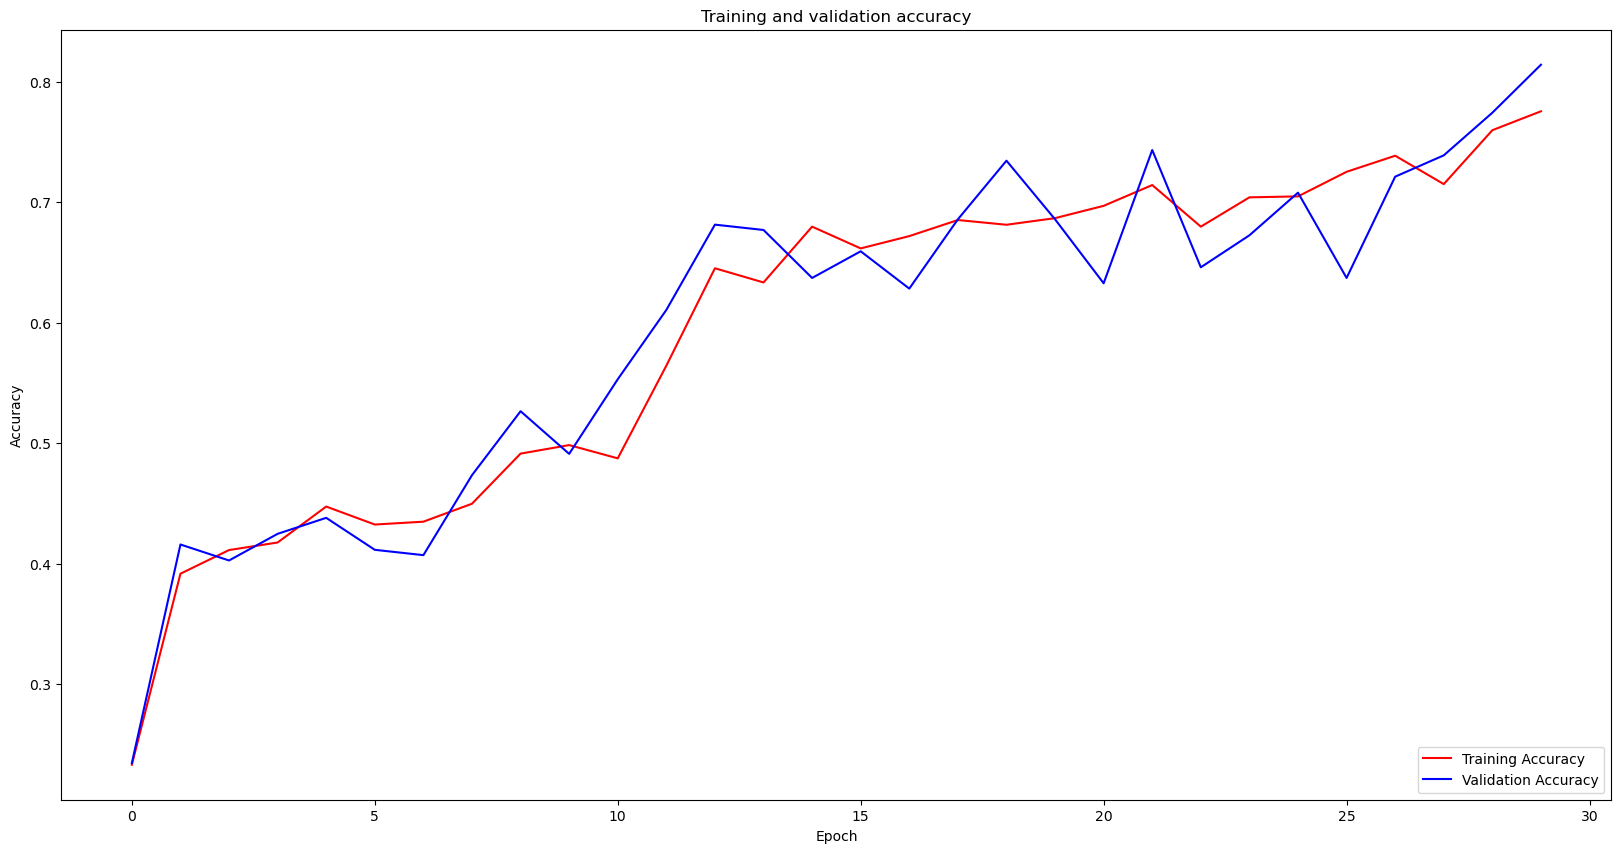

In [23]:

fig = plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()
fig.savefig('../Accuracy_curve_CNN_aug_256.jpg')


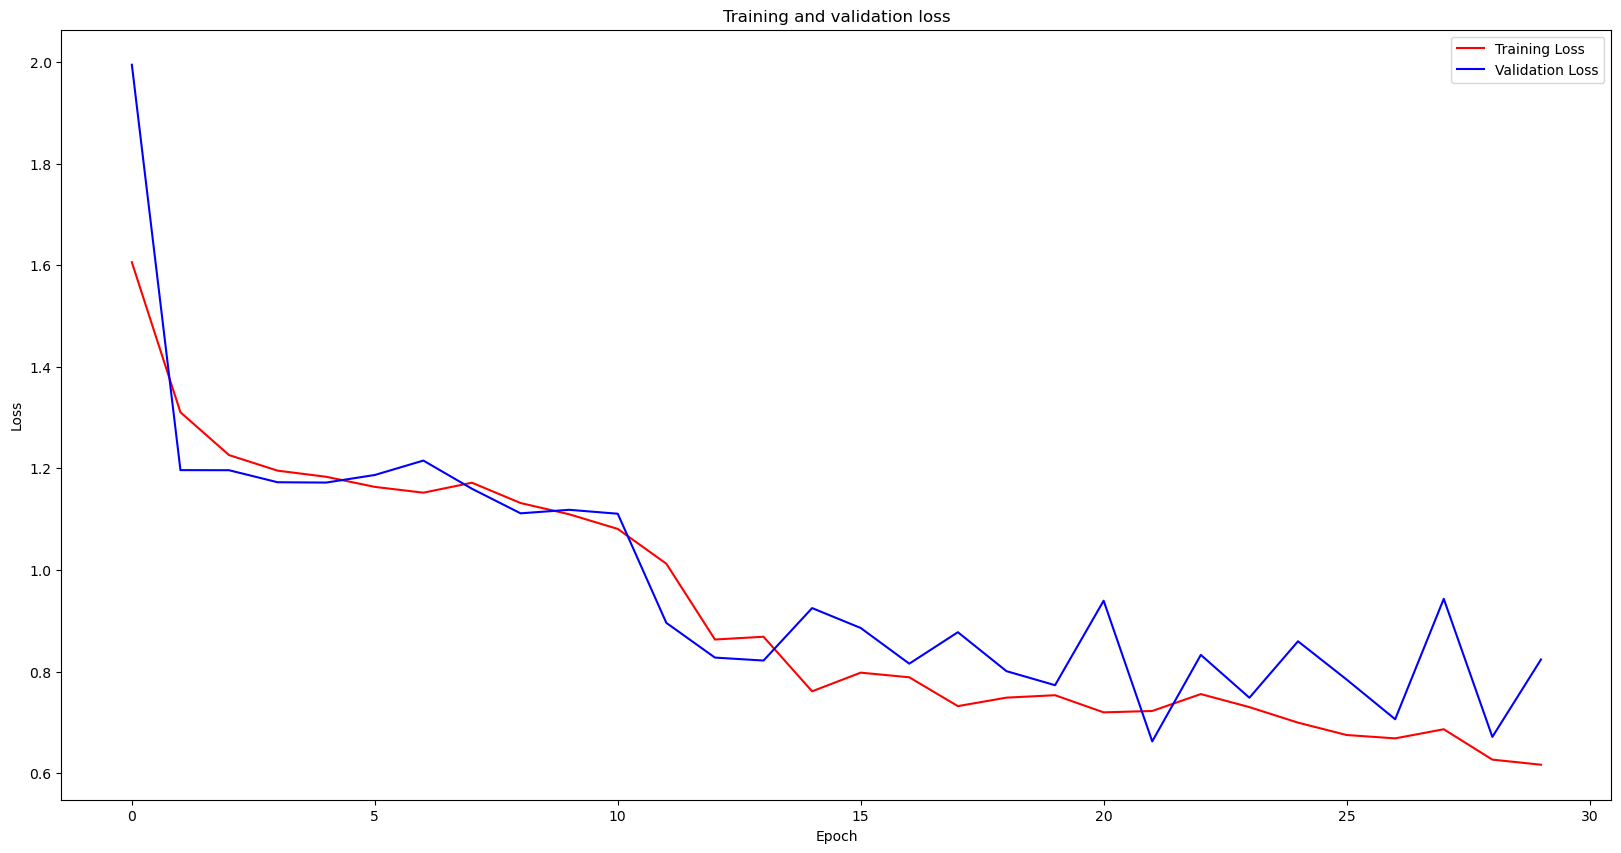

In [24]:

fig2 = plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
fig2.savefig('../Loss_curve_CNN_aug_256.jpg')



Confusion Matrix


In [44]:
import numpy as np, pandas as pd

In [45]:
test_preprocessed_images = np.load('../preprocessed_test_images/test_preproc_resnet.npy')

In [46]:
test_df = pd.read_csv('../dataset/test.csv')
y_true = test_df['labels']

In [47]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
y_pred = np.argmax(array, axis=1)

30/30 [==============================] - 1s 17ms/step


In [48]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, y_pred)

In [49]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [50]:
train_dir = '../weather_pred//Data/training/'
classes = os.listdir(train_dir)

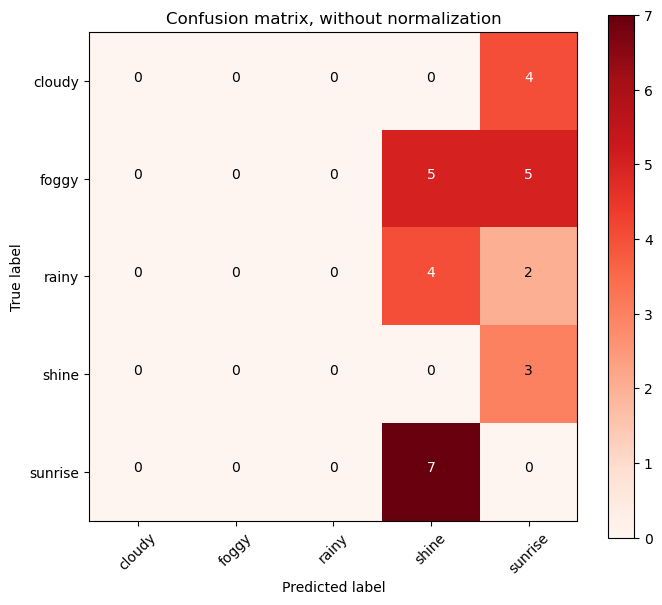

In [51]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
#fig1.savefig('../cm_wo_norm.jpg')
plt.show()

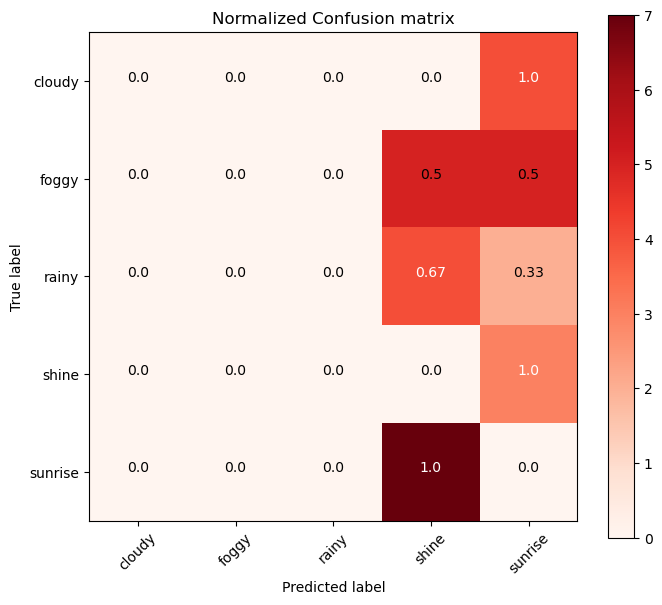

In [52]:
np.set_printoptions(precision=2)

fig2 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, normalize = True, title='Normalized Confusion matrix')
fig2.savefig('../cm_norm.jpg')
plt.show()

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [54]:
accuracy_score(y_pred, y_true)

0.0